In [1]:
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [2]:
base_dir = 'data/archive/'
train_dir = os.path.join(base_dir, 'seg_train/seg_train')
test_dir = os.path.join(base_dir, 'seg_test/seg_test')

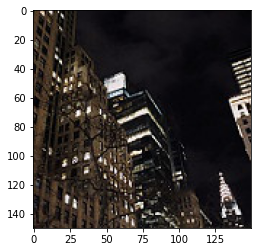

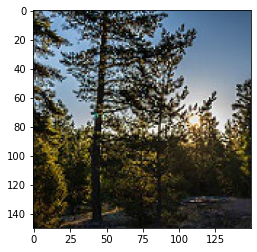

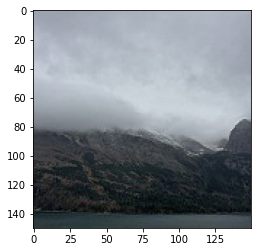

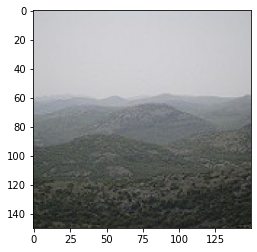

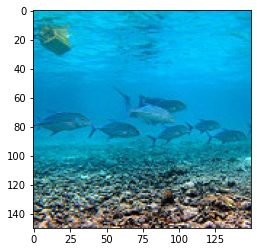

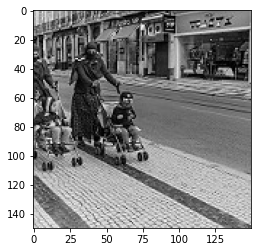

In [3]:
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# pick a sample to visualize from all the categories in the training set
for cate in categories:
    path = os.path.join(train_dir, cate)
    for i in os.listdir(path):
        img = plt.imread(os.path.join(path, i))
        plt.imshow(img)
        plt.show()
        break

In [4]:
# build a function to automate the process of collecting data for both the train and test set
def getXy(link):
    images = []
    labels = []
    resize_height = 80
    resize_weight = 75
    for cate in categories:
        path = os.path.join(link, cate)
        cate_num = categories.index(cate)
        for i in os.listdir(path):
            try:
                img = plt.imread(os.path.join(path, i))
                # resize all the images to make sure have the same scale
                resized_image = resize(img, (resize_height, resize_weight))
                images.append(resized_image)
                labels.append(cate_num)
            except Exception as e:
                pass
    # convert images and labels into a numpy array
    images = np.array(images)
    labels = np.array(labels)
    # one hot encode the label array
    labels = labels.reshape(len(labels), 1)
    oh_encoder = OneHotEncoder(sparse=False)
    ohe_labels = oh_encoder.fit_transform(labels)
    # shuffle the data
    images, ohe_labels = shuffle(images, ohe_labels)
    return images, ohe_labels

In [5]:
train_X, train_y = getXy(train_dir)

In [6]:
train_X.shape

(14034, 80, 75, 3)

In [7]:
train_y.shape

(14034, 6)

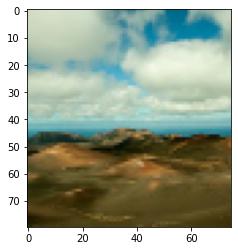

In [8]:
plt.imshow(train_X[2])

In [9]:
train_y[2]

array([0., 0., 0., 1., 0., 0.])

In [10]:
# now get the testing data
test_X, test_y = getXy(test_dir)
print(test_X.shape)
print(test_y.shape)

(3000, 80, 75, 3)
(3000, 6)


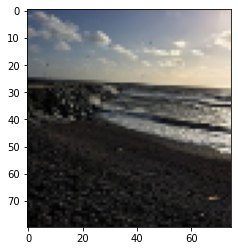

In [11]:
plt.imshow(test_X[0])

In [12]:
test_y[0]

array([0., 0., 0., 0., 1., 0.])

In [13]:
# 
img_rows = 80
img_cols = 75
# 
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu',
                input_shape=(img_rows, img_cols, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.45))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.45))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 75, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 37, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 35, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 15, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 17, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 13, 32)        9

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(train_X, train_y, validation_split=0.2, epochs=15, verbose=1)
model.evaluate(test_X, test_y, verbose=1)

Epoch 1/15
351/351 [==============================] - 45s 127ms/step - loss: 1.5982 - accuracy: 0.3346 - val_loss: 1.2814 - val_accuracy: 0.4959
Epoch 2/15
351/351 [==============================] - 45s 128ms/step - loss: 1.1584 - accuracy: 0.5427 - val_loss: 1.0038 - val_accuracy: 0.6120
Epoch 3/15
351/351 [==============================] - 45s 128ms/step - loss: 1.0067 - accuracy: 0.6139 - val_loss: 0.9169 - val_accuracy: 0.6441
Epoch 4/15
351/351 [==============================] - 45s 128ms/step - loss: 0.9232 - accuracy: 0.6522 - val_loss: 0.7821 - val_accuracy: 0.7118
Epoch 5/15
351/351 [==============================] - 45s 128ms/step - loss: 0.8320 - accuracy: 0.6963 - val_loss: 0.7225 - val_accuracy: 0.7250
Epoch 6/15
351/351 [==============================] - 45s 128ms/step - loss: 0.7594 - accuracy: 0.7315 - val_loss: 0.6576 - val_accuracy: 0.7652
Epoch 7/15
351/351 [==============================] - 45s 128ms/step - loss: 0.6982 - accuracy: 0.7583 - val_loss: 0.6206 - val_ac

[0.5171878337860107, 0.8240000009536743]